In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('dataset_candidatura_wr/odometry_dual_catastrophic.txt')
data=data.iloc[:,:-1]
cols=['x_w','y_w','th_w','x_1','y_1','th_1','hmm_1','hmm_2','real_cuant','x','y','th']
data.columns=cols
data['error_w']=np.linalg.norm(data[['x_w','y_w']].values-data[['x','y']].values ,axis=1)
data['error_th_w']=np.linalg.norm(data[['th_w']].values-data[['th']].values ,axis=1)
data['error_dual']=np.linalg.norm(data[['x_1','y_1']].values-data[['x','y']].values ,axis=1)
data['error_th_dual']=np.linalg.norm(data[['th_1']].values-data[['th']].values ,axis=1)


data

,x_w,y_w,th_w,x_1,y_1,th_1,hmm_1,hmm_2,real_cuant,x,y,th,error_w,error_th_w,error_dual,error_th_dual
0,0.446131,0.220399,0.542651,0.447034,0.503635,0.547417,4.0,4.0,4.0,0.449654,0.222232,0.541957,0.003972,0.000694,0.281415,0.005460
1,0.453820,0.224359,0.536151,0.454678,0.507682,0.540917,4.0,4.0,4.0,0.462964,0.228968,0.545379,0.010240,0.009228,0.278836,0.004462
2,0.475809,0.235386,0.568658,0.476964,0.518095,0.573424,4.0,4.0,4.0,0.476346,0.235369,0.567480,0.000538,0.001177,0.282726,0.005944
3,0.489409,0.242514,0.589879,0.490680,0.524998,0.594645,4.0,4.0,4.0,0.489198,0.241823,0.586883,0.000723,0.002996,0.283179,0.007762
4,0.496555,0.246312,0.600142,0.497846,0.528756,0.604908,4.0,4.0,4.0,0.501376,0.248347,0.604593,0.005233,0.004451,0.280432,0.000315
5,0.509437,0.253468,0.618697,0.510826,0.535735,0.623463,4.0,28.0,4.0,0.513114,0.255027,0.621800,0.003993,0.003104,0.280717,0.001662
6,0.522973,0.261345,0.638175,0.524476,0.543411,0.642941,4.0,28.0,4.0,0.524649,0.261847,0.638503,0.001749,0.000328,0.281565,0.004438
7,0.528658,0.264791,0.645147,0.530169,0.546844,0.649913,4.0,28.0,4.0,0.536100,0.268783,0.640963,0.008445,0.004184,0.278124,0.008950
8,0.542217,0.273045,0.629568,0.543557,0.555373,0.634335,4.0,28.0,4.0,0.547713,0.275949,0.624330,0.006216,0.005239,0.279456,0.010005
9,0.555210,0.280483,0.610950,0.556373,0.563112,0.615716,4.0,28.0,4.0,0.559766,0.282895,0.607501,0.005155,0.003449,0.280238,0.008215


In [3]:

def plot_path(path):
    fig=plt.figure(figsize=(10,10))
    
    
    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
       
        if i < 2or   i >= len(path)-2 :
            
           
            size=50
            color='blue'
            if  i >= len(path)-2:
                color='red'
            plt.plot(c[0], c[1], marker=(1, 1,ang -90), markersize=size*2,c=color, linestyle='None',alpha=0.75)
        else:
            size=10
            color='green'
        

        plt.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=size,c=color, linestyle='None',alpha=0.5)
        #plt.plot(c[0]-(.01*np.cos(c[2])), c[1]-(.01*np.sin(c[2])), marker=(1, 1,ang+ 90), markersize=25,c='green', linestyle='--')
        #plt.plot(c[0]-(.01*np.cos(c[2]+.5*math.pi)), c[1]-(.01*np.sin(c[2]+.5*math.pi)), marker=(1, 1,ang), markersize=25,c='blue', linestyle='--')

    #plt.xlim([0,4])
    #plt.ylim([0,4])

    plt.show()

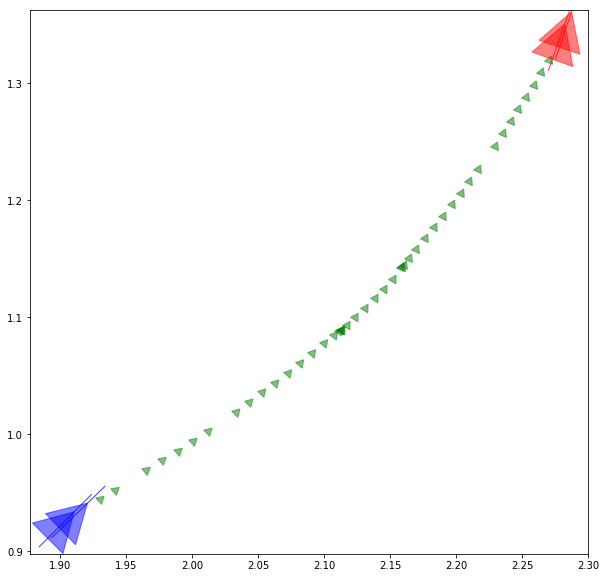

In [4]:
episode_length=50

start= np.int(np.random.rand()*(len(data)-episode_length))
path = data[['x','y','th']].iloc[start:start+episode_length].values
plot_path(path)

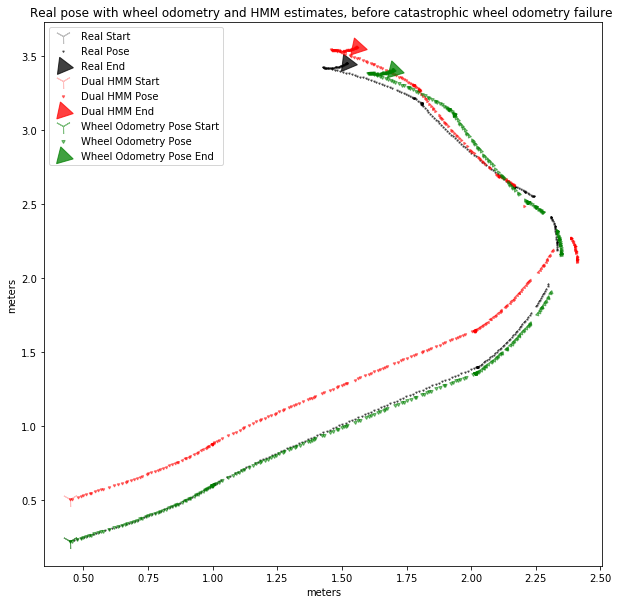

In [5]:
def plot_run_poses(data,start=0,length=500, title=''):
    
    data_s=data.iloc[start:start+length]
    #data_s=data
    fig = plt.figure(figsize=(10,10))
    

    path = data_s[['x','y','th']].values
    
   
    ax1 = fig.add_subplot(111)
    ax1.set_title( title)
    ax1.set_ylabel('meters')
    ax1.set_xlabel('meters')
    
    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
        if i== 0:
            ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='black', linestyle='None',alpha=0.25, label='Real Start')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=2,c='black', linestyle='None',alpha=0.5, label= 'Real Pose')
    ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='black', linestyle='None',alpha=0.75, label='Real End')
    
    
    path = data_s[['x_1','y_1','th_1']].values
    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
        if i== 0:
            ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='red', linestyle='None',alpha=0.25, label='Dual HMM Start')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=3,c='red', linestyle='None',alpha=0.5, label= 'Dual HMM Pose')
    ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='red', linestyle='None',alpha=0.75, label='Dual HMM End')
    path = data_s[['x_w','y_w','th_w']].values

    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
        if i== 0:
            ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='green', linestyle='None',alpha=0.5, label='Wheel Odometry Pose Start')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=4,c='green', linestyle='None',alpha=0.5, label= 'Wheel Odometry Pose')
    ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='green', linestyle='None',alpha=0.75, label='Wheel Odometry Pose End')
    plt.legend()
    

plot_run_poses(data,length=400,title="Real pose with wheel odometry and HMM estimates, before catastrophic wheel odometry failure ")

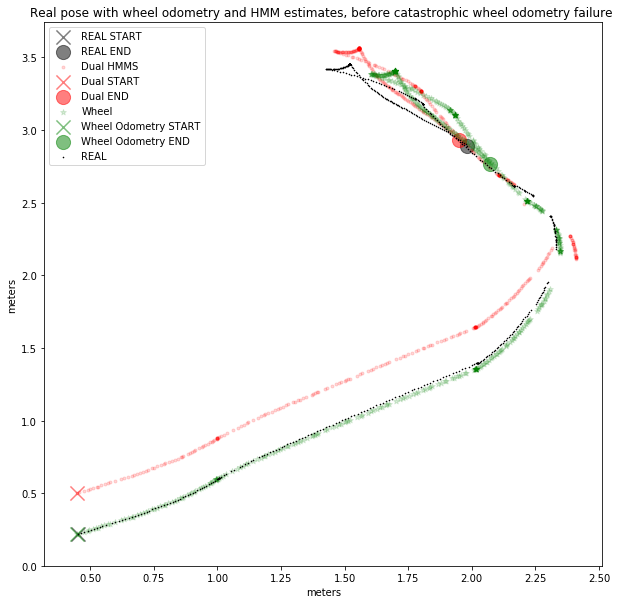

In [6]:
def plot_run(data,start=0,length=500, title=''):
    
    data_s=data.iloc[start:start+length]
    #data_s=data
    fig = plt.figure(figsize=(10,10))


    ax1 = fig.add_subplot(111)
    ax1.set_title( title)
    ax1.set_ylabel('meters')
    ax1.set_xlabel('meters')
    ax1.scatter(x= data_s.x.iloc[:1], y=data_s.y.iloc[:1],marker='x',s=200,c='black',alpha=.5,label= 'REAL START')
    ax1.scatter(x= data_s.x.iloc[-1:], y=data_s.y.iloc[-1:],marker='o',s=200,c='black',alpha=.5,label= 'REAL END')
    ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c='red',alpha=.15,label= 'Dual HMMS')
    ax1.scatter(x= data_s.x_1.iloc[:1], y=data_s.y_1.iloc[:1],marker='x',s=200,c='red',alpha=.5,label= 'Dual START')
    ax1.scatter(x= data_s.x_1.iloc[-1:], y=data_s.y_1.iloc[-1:],marker='o',s=200,c='red',alpha=.5,label= 'Dual END')
    ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.15,label= 'Wheel')
    ax1.scatter(x= data_s.x_w.iloc[:1], y=data_s.y_w.iloc[:1],marker='x',s=200,c='green',alpha=.5,label= 'Wheel Odometry START')
    ax1.scatter(x= data_s.x_w.iloc[-1:], y=data_s.y_w.iloc[-1:],marker='o',s=200,c='green',alpha=.5,label= 'Wheel Odometry END')
    ax1.scatter(x= data_s.x, y=data_s.y,marker='*',s=.5,c='black',label= "REAL")
    plt.legend()
    

plot_run(data,title="Real pose with wheel odometry and HMM estimates, before catastrophic wheel odometry failure ")

/usr/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


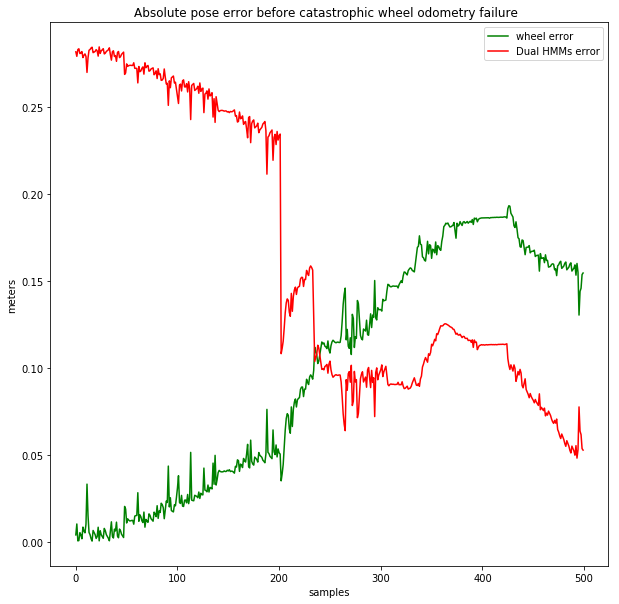

In [7]:
def plot_error (data,start=0,length=500,title=''):
    data_s=data.iloc[start:start+length]
    fig = plt.figure(figsize=(10,10))
    plt.plot(data_s.error_w,c='green',label='wheel error')
    plt.plot(data_s.error_dual,c='red',label='Dual HMMs error')


    ax1 = fig.add_subplot(111)
    ax1.set_title( title)
    ax1.set_ylabel('meters')
    ax1.set_xlabel('samples')
    ax1.legend()
plot_error(data,title="Absolute pose error before catastrophic wheel odometry failure  ")

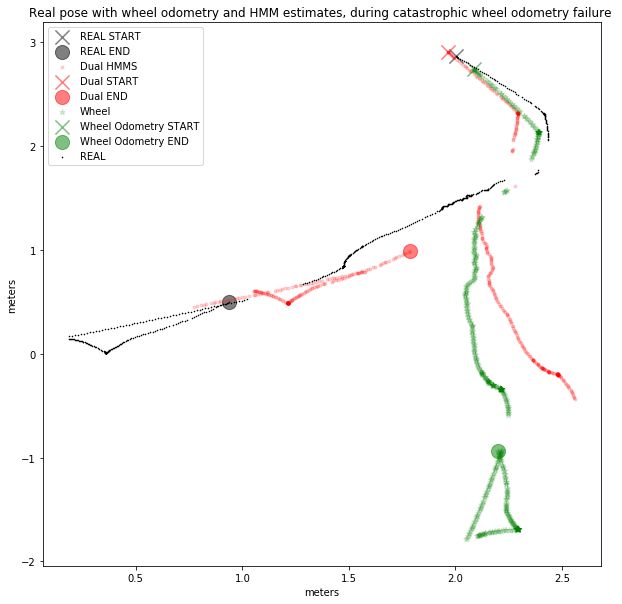

In [8]:
plot_run(data,501,title="Real pose with wheel odometry and HMM estimates, during catastrophic wheel odometry failure ")


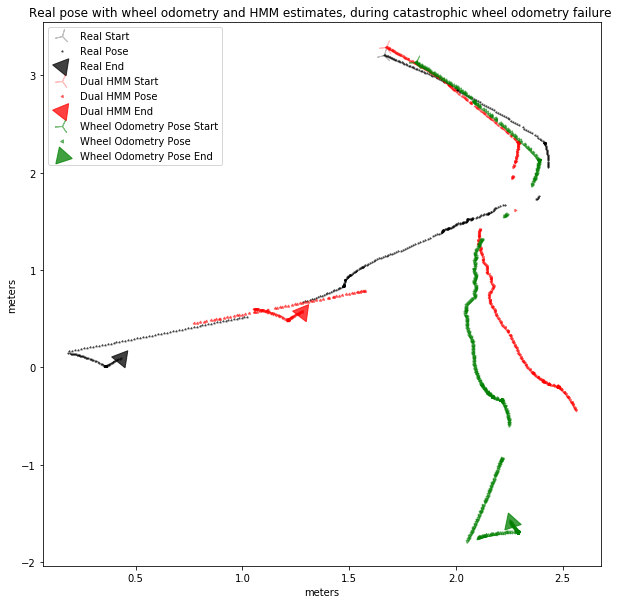

In [9]:
plot_run_poses(data,451,title="Real pose with wheel odometry and HMM estimates, during catastrophic wheel odometry failure ")


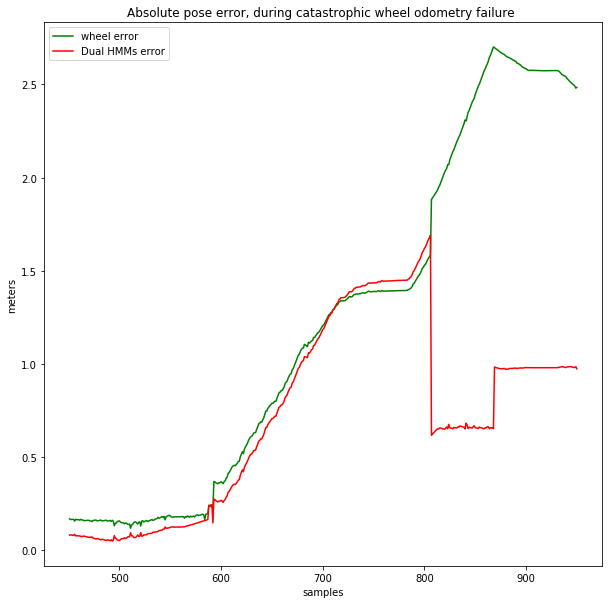

In [21]:
plot_error(data,451,title="Absolute pose error, during catastrophic wheel odometry failure ")

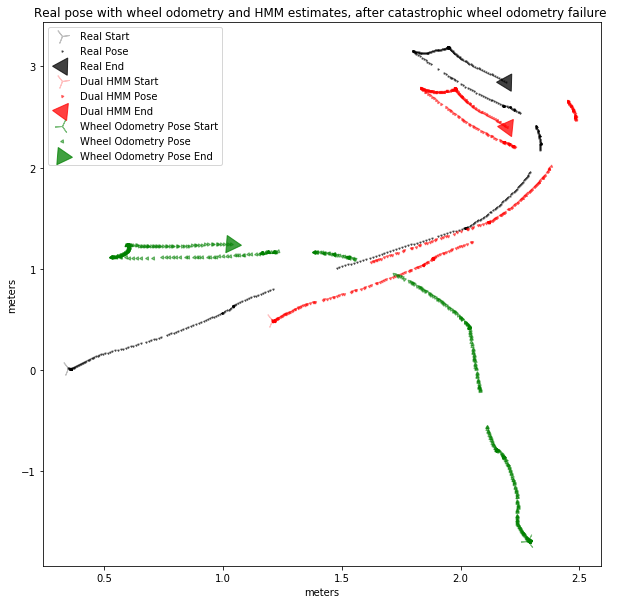

In [21]:
plot_run_poses(data,900,title="Real pose with wheel odometry and HMM estimates, after catastrophic wheel odometry failure ")


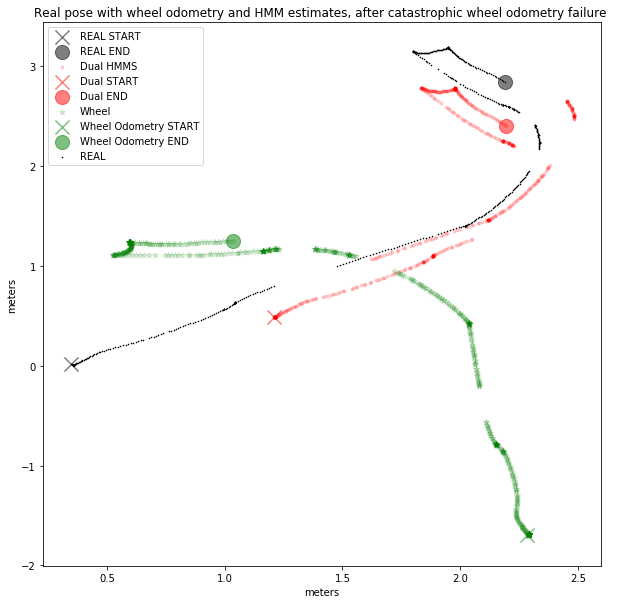

In [22]:
plot_run(data,900,title="Real pose with wheel odometry and HMM estimates, after catastrophic wheel odometry failure ")

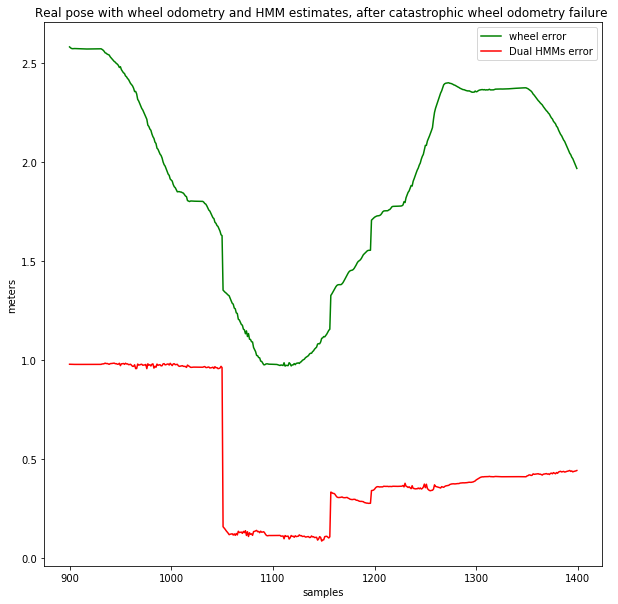

In [23]:
plot_error(data,900,title="Real pose with wheel odometry and HMM estimates, after catastrophic wheel odometry failure ")

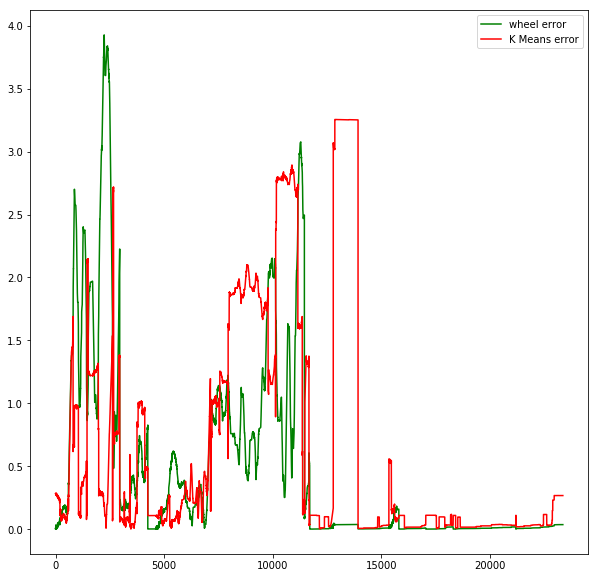

In [20]:
fig = plt.figure(figsize=(10,10))
plt.plot(data.error_w,c='green',label='wheel error')
plt.plot(data.error_dual,c='red',label='K Means error')


ax1 = fig.add_subplot(111)
ax1.legend()

In [1]:
plot_run(data,0,2900)

NameError: name 'plot_run' is not defined

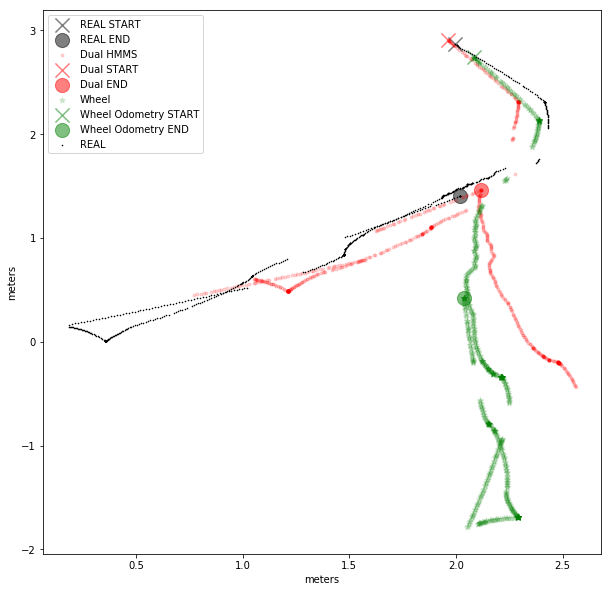

In [16]:
plot_run(data,500,600)

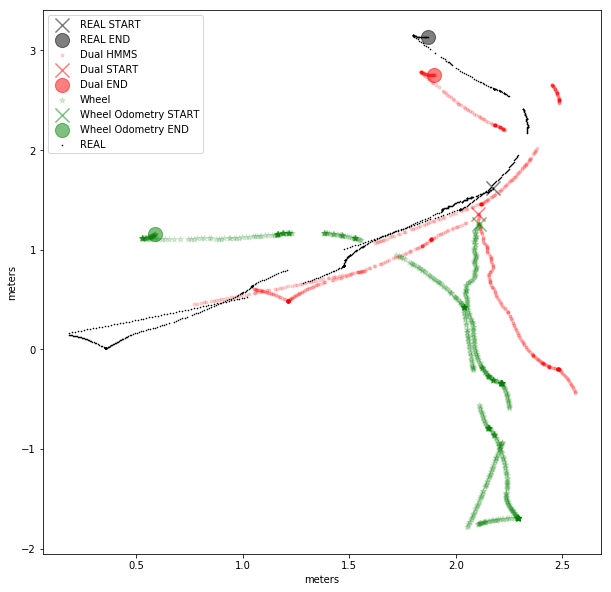

In [17]:
plot_run(data,600,700)